In [1]:
import os
import pandas as pd
import seaborn as sns
import numpy as np
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
from sklearn import tree
from sklearn.metrics import accuracy_score
from sklearn import preprocessing
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import minmax_scale
from sklearn.preprocessing import MaxAbsScaler
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import RobustScaler
from sklearn.preprocessing import Normalizer
from sklearn.preprocessing import QuantileTransformer
from sklearn.preprocessing import PowerTransformer
%matplotlib inline
import matplotlib as mpl
from matplotlib import cm
import matplotlib.pyplot as plt
from IPython.core.interactiveshell import InteractiveShell
from sklearn.linear_model import RidgeCV, ElasticNetCV, LassoCV 
from sklearn.decomposition import PCA #Principal Component Analysis
from sklearn.preprocessing import LabelEncoder #transforms categorical into numbers
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.metrics import roc_auc_score, make_scorer

In [2]:
titanic_train= pd.read_csv('train.csv')
titanic_test= pd.read_csv('test.csv')

In [3]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [4]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
#Look for missing values

titanic_train.isnull().sum()

#Maybe eliminate age

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
titanic_test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [7]:
#Look at one instance of missing fare in test set

titanic_test.loc[titanic_test.Fare.isnull()]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,S


In [8]:
#Get the mean fare for Pclass 3
titanic_test.groupby("Pclass").Fare.describe()

,count,mean,std,min,25%,50%,75%,max
Pclass,,,,,,,,
1,107.0,94.280297,84.435858,0.0000,30.10,60.0000,134.5,512.3292
2,93.0,22.202104,13.991877,9.6875,13.00,15.7500,26.0,73.5000
3,217.0,12.459678,10.803698,3.1708,7.75,7.8958,14.4,69.5500


In [9]:
missing_fare = np.where(titanic_test.Fare.isnull())
for row in missing_fare:
    titanic_test.iloc[row] = titanic_test.iloc[row].fillna(12.459678)

In [10]:
#Drop cabin

titanic_train.drop(['Cabin'], axis = 1)
titanic_test.drop(['Cabin'], axis = 1)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


In [11]:
#Make sex feature binary for test and train sets

enc = LabelEncoder()
for i in titanic_train:
    if 'Sex' in i:
        titanic_train[i] = enc.fit_transform(titanic_train[i])

In [12]:
titanic_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,NaN,S


In [13]:
enc = LabelEncoder()
for i in titanic_test:
    if 'Sex' in i:
        titanic_test[i] = enc.fit_transform(titanic_test[i])

In [14]:
titanic_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,NaN,S


In [15]:
# set ID column as index
titanic_train.set_index('PassengerId', inplace=True)
titanic_test.set_index('PassengerId', inplace=True)

In [16]:
#Display numerical features only

titanic_numbers = titanic_train.select_dtypes('number')

In [17]:
titanic_numbers.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
PassengerId,,,,,,,
1,0,3,1,22.0,1,0,7.2500
2,1,1,0,38.0,1,0,71.2833
3,1,3,0,26.0,0,0,7.9250
4,1,1,0,35.0,1,0,53.1000
5,0,3,1,35.0,0,0,8.0500


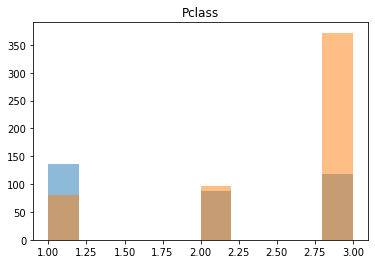

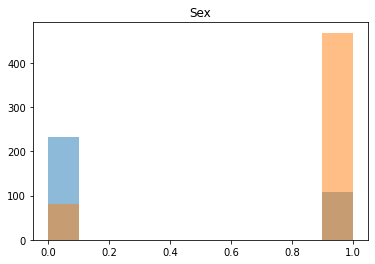

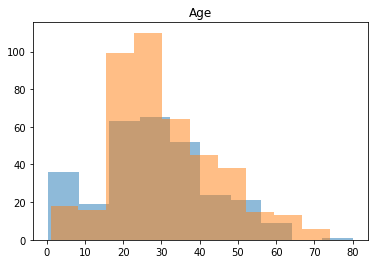

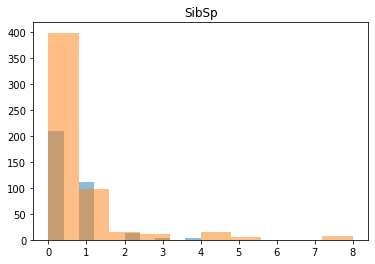

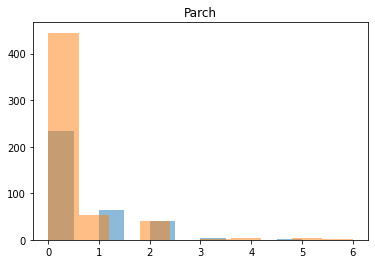

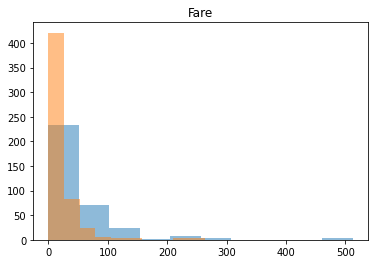

In [18]:
alive= titanic_numbers[titanic_numbers['Survived']==1].drop('Survived', axis=1)
dead= titanic_numbers[titanic_numbers['Survived']==0].drop('Survived', axis=1)
for call in range(alive.values.shape[1]):
    fig= plt.figure()
    plt.hist(alive.values[:,call], alpha=0.5)
    plt.hist(dead.values[:,call], alpha=0.5)
    plt.title(alive.columns[call])
    plt.show()

In [19]:
print(titanic_train['Age'].value_counts())
##very small ages but 88 different age values
print(titanic_train['Fare'].value_counts())
##lots of different prices
print(titanic_train['Parch'].value_counts())

24.00    30
22.00    27
18.00    26
19.00    25
30.00    25
         ..
55.50     1
70.50     1
66.00     1
23.50     1
0.42      1
Name: Age, Length: 88, dtype: int64
8.0500     43
13.0000    42
7.8958     38
7.7500     34
26.0000    31
           ..
8.4583      1
9.8375      1
8.3625      1
14.1083     1
17.4000     1
Name: Fare, Length: 248, dtype: int64
0    678
1    118
2     80
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64


In [20]:
## Correlation Matrix for Survived

corr_matrix = titanic_train.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.077221
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

In [21]:
#Handling the missing data in the dataset by setting to mean, respectively

titanic_train['Age'].fillna(titanic_train['Age'].mean(), inplace =True)
titanic_train['Cabin'].fillna('N', inplace =True)
titanic_train['Embarked'].fillna('N', inplace =True)
titanic_train['Fare'].fillna(titanic_train['Fare'].mean(), inplace=True)


titanic_test['Age'].fillna(titanic_test['Age'].mean(), inplace =True)
titanic_test['Cabin'].fillna('N', inplace =True)
titanic_test['Embarked'].fillna('N', inplace =True)
titanic_test['Fare'].fillna(titanic_test['Fare'].mean(), inplace=True)

In [22]:
#Cabin can be transformed using the letter prefix
titanic_train['Cabin'] = titanic_train['Cabin'].str[:1]
print(titanic_train['Cabin'].head(3))
titanic_train['Cabin'].value_counts()

titanic_test['Cabin'] = titanic_test['Cabin'].str[:1]

PassengerId
1    N
2    C
3    N
Name: Cabin, dtype: object


In [23]:
#Use encoder to transform categories into numbers
from sklearn import preprocessing

def encode_features(data):
    features =['Cabin', 'Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(data[feature])
        data[feature] = le.transform(data[feature])
        
    return data

titanic_trainE = encode_features(titanic_train)
titanic_trainE.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [24]:
def encode_features(data):
    features =['Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(data[feature])
        data[feature] = le.transform(data[feature])
        
    return data

titanic_testE = encode_features(titanic_test)

In [25]:
#Correlation Matrix of the key variables
corr_matrix = titanic_trainE.corr()
corr_matrix["Survived"].sort_values(ascending=False)

Survived    1.000000
Fare        0.257307
Parch       0.081629
SibSp      -0.035322
Age        -0.069809
Embarked   -0.174963
Cabin      -0.295113
Pclass     -0.338481
Sex        -0.543351
Name: Survived, dtype: float64

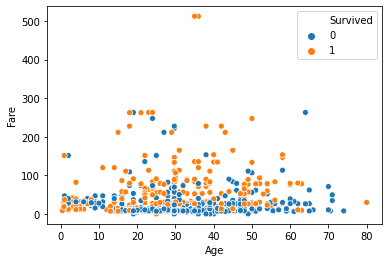

In [26]:
#Scatter between age and Fare with colors for survival or not
sns.scatterplot( x="Age", y="Fare", data=titanic_trainE, hue='Survived', legend="brief")
plt.show()

In [27]:
titanic_train.groupby('Survived').mean()

,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
Survived,,,,,,,,
0,2.531876,0.852459,30.415100,0.553734,0.329690,22.117887,6.426230,2.504554
1,1.950292,0.318713,28.549778,0.473684,0.464912,48.395408,5.175439,2.084795


In [28]:
titanic_train.groupby('Survived').mean().mean()

Pclass       2.241084
Sex          0.585586
Age         29.482439
SibSp        0.513709
Parch        0.397301
Fare        35.256647
Cabin        5.800834
Embarked     2.294675
dtype: float64

In [29]:
#Variables to binary--> Pclass 1,2= 0 3=1
#Sex
#Age--> split = 29.482439
#Fare--> split = 35.256647
#Cabin--> if 7=0 if not 7=1
#Embarked---> if 3=0 if not 3=1

In [30]:
#Drop Name and Ticket 
titanic_trainE.drop(['Name','Ticket'],axis=1,inplace=True)
titanic_trainE.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,3,1,22.0,1,0,7.2500,7,3
2,1,1,0,38.0,1,0,71.2833,2,0
3,1,3,0,26.0,0,0,7.9250,7,3
4,1,1,0,35.0,1,0,53.1000,2,3
5,0,3,1,35.0,0,0,8.0500,7,3


In [31]:
titanic_trainE['Pclass']= titanic_trainE['Pclass'].transform(lambda x:1 if x==3 else 0)
titanic_trainE['Age']= titanic_trainE['Age'].transform(lambda x:1 if x>29.48 else 0)
titanic_trainE['Fare']= titanic_trainE['Fare'].transform(lambda x:1 if x>35.26 else 0)
titanic_trainE['Cabin']= titanic_trainE['Cabin'].transform(lambda x:0 if x==7 else 1)
titanic_trainE['Embarked']= titanic_trainE['Embarked'].transform(lambda x:0 if x==3 else 1)

In [32]:
titanic_trainE.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked
PassengerId,,,,,,,,,
1,0,1,1,0,1,0,0,0,0
2,1,0,0,1,1,0,1,1,1
3,1,1,0,0,0,0,0,0,0
4,1,0,0,1,1,0,1,1,0
5,0,1,1,1,0,0,0,0,0


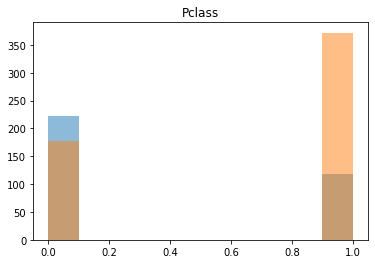

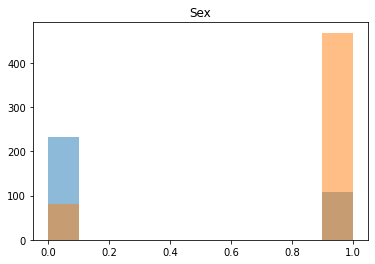

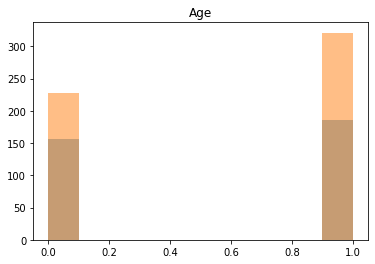

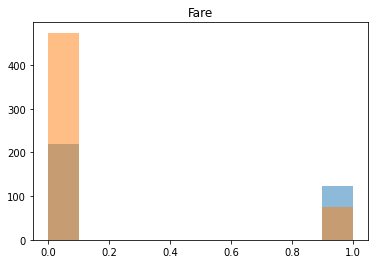

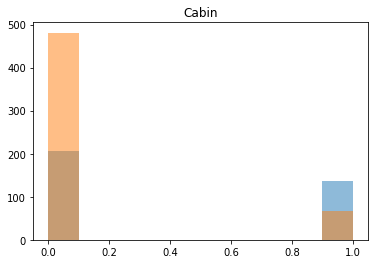

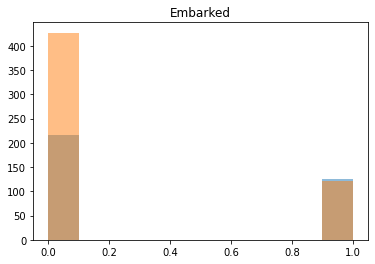

In [33]:
dropping= ['Survived', 'SibSp', 'Parch']
alive= titanic_trainE[titanic_trainE['Survived']==1].drop(dropping, axis=1)
dead= titanic_trainE[titanic_trainE['Survived']==0].drop(dropping, axis=1)
for call in range(alive.values.shape[1]):
    fig= plt.figure()
    plt.hist(alive.values[:,call], alpha=0.5)
    plt.hist(dead.values[:,call], alpha=0.5)
    plt.title(alive.columns[call])
    plt.show()

In [34]:
titanic_trainE.drop(dropping, axis=1).to_csv('Titanic Train X.csv', index_label= 'PassengerId')
titanic_trainE['Survived'].to_csv('Titanic Train y.csv', index_label= 'PassengerId')
titanic_test.drop(dropping[1:], axis=1).to_csv('Titanic Test X.csv', index_label= 'PassengerId')

In [35]:
train_X= pd.read_csv('Titanic Train X.csv', index_col= 'PassengerId')
train_y= pd.read_csv('Titanic Train y.csv', index_col= 'PassengerId')
test_X= pd.read_csv('Titanic Test X.csv', index_col= 'PassengerId')

In [36]:
print(train_X)

             Pclass  Sex  Age  Fare  Cabin  Embarked
PassengerId                                         
1                 1    1    0     0      0         0
2                 0    0    1     1      1         1
3                 1    0    0     0      0         0
4                 0    0    1     1      1         0
5                 1    1    1     0      0         0
...             ...  ...  ...   ...    ...       ...
887               0    1    0     0      0         0
888               0    0    0     0      1         0
889               1    0    1     0      0         0
890               0    1    0     0      1         1
891               1    1    1     0      0         1

[891 rows x 6 columns]


In [37]:
from sklearn.model_selection import GridSearchCV

train_X.drop(['Embarked', 'Cabin'], axis=1, inplace=True)

NB_params= {'alpha':[0, 0.5, 1], 'fit_prior':[True, False]}
LR_params= {'C':[0.2, 0.5, 1, 5]}
grid= GridSearchCV(LogisticRegression(), LR_params, cv=5, scoring= make_scorer(roc_auc_score))
grid.fit(train_X.values, train_y.values)
print(grid.cv_results_)
grid_NB= GridSearchCV(BernoulliNB(), NB_params, cv=5, scoring= make_scorer(roc_auc_score))
grid_NB.fit(train_X.values, train_y.values)
print(grid_NB.cv_results_)

/Users/michaelvenit/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/michaelvenit/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/michaelvenit/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/michaelvenit/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

{'mean_fit_time': array([0.03862205, 0.00395947, 0.0058979 , 0.00620818]), 'std_fit_time': array([0.06993293, 0.00039286, 0.00130927, 0.00067046]), 'mean_score_time': array([0.00093894, 0.00099025, 0.00145664, 0.00143685]), 'std_score_time': array([8.51037982e-05, 2.03623012e-04, 3.05584157e-04, 2.65759731e-04]), 'param_C': masked_array(data=[0.2, 0.5, 1, 5],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.2}, {'C': 0.5}, {'C': 1}, {'C': 5}], 'split0_test_score': array([0.70889328, 0.70889328, 0.70889328, 0.70889328]), 'split1_test_score': array([0.78756684, 0.78756684, 0.78756684, 0.78756684]), 'split2_test_score': array([0.76831551, 0.76831551, 0.76831551, 0.76831551]), 'split3_test_score': array([0.72139037, 0.72139037, 0.72139037, 0.72139037]), 'split4_test_score': array([0.76452599, 0.76452599, 0.76452599, 0.76452599]), 'mean_test_score': array([0.7501384, 0.7501384, 0.7501384, 0.7501384]), 'std_test_score': arra

/Users/michaelvenit/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/michaelvenit/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/Users/michaelvenit/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().

/Users/michaelvenit/opt/anaconda3/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning:

alpha too small will result in numeric errors, setting alpha = 1.0e-10

/Users/michaelvenit/opt/anaconda3/lib/python3.7/site-packages/sklearn/utils/validation.py:760: DataConversionWarning:

A column-vector y was p

In [46]:
print(grid_NB.best_score_)
print(grid.best_score_)

0.7604717877287623
0.750138400357786


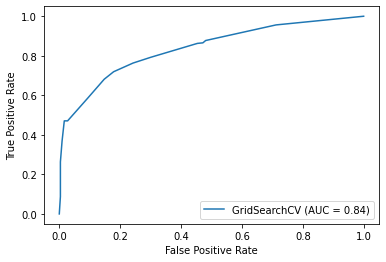

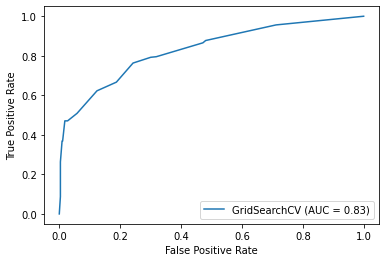

In [51]:
from sklearn.metrics import plot_roc_curve

plot_roc_curve(grid, train_X, train_y)
plot_roc_curve(grid_NB, train_X, train_y)
plt.show()

In [38]:
test_X.drop(['Name','Ticket', 'Embarked', 'Cabin'],axis=1,inplace=True)

In [39]:
y_preds_LR= grid.predict(test_X)
y_preds_NB= grid_NB.predict(test_X)

In [59]:
final= pd.read_csv('test.csv')
PID= final['PassengerId'].copy()
LR_preds= pd.DataFrame(y_preds_LR)
LR_preds.columns= ['Survived']
file_LR= pd.concat([PID, LR_preds], axis= 1)
file_LR

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [60]:
PID= final['PassengerId'].copy()
NB_preds= pd.DataFrame(y_preds_NB)
NB_preds.columns= ['Survived']
file_NB= pd.concat([PID, NB_preds], axis= 1)
file_NB

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [61]:
file_LR.to_csv('Logistic_preds.csv')
file_NB.to_csv('Naive_Bayes_preds.csv')